In [1]:
from os import listdir
from os.path import join
import os
from bs4 import BeautifulSoup
import re
import csv
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle

# My Data Reader Class
I have used my following code to read the dataset from given data.

In [2]:
class CourpousDataReader:
    def __init__(self):
        self.femalesList = []
        self.malesList = []
#   Female Data loading
        femalesFilesLocation = "twitter-gender-corpus/female"
        listOfAllFemalFiles = listdir(femalesFilesLocation)
        for fileName in listOfAllFemalFiles:
            currentFemaleFile=  open(join(femalesFilesLocation,fileName) , "r",
                                     encoding = "utf-8")
            self.femalesList.append(currentFemaleFile.read().rstrip("\n\r"))
            currentFemaleFile.close()
#   Male Data loading
        malesFilesLocation = "twitter-gender-corpus/male"
        listOfAllMalFiles = listdir(malesFilesLocation)
        for fileName in listOfAllMalFiles:
            currentMaleFile=  open(join(malesFilesLocation,fileName) , "r",
                                   encoding = "utf-8")
            self.malesList.append(currentMaleFile.read().rstrip("\n\r"))
            currentMaleFile.close()
            


# Task 1: Feature Extraction

## Stylometry Base Feature Extraction

In [3]:
directory = "Stylometry-Base-Method-Files"
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"stylometry-features.csv") , 'w', newline='' ,
          encoding = "utf-8") as csvfile:
    fieldNames = ['Number of commas','Number of full stop','Number of @',
                  'Number of (','Number of )','Number of !','Number of -',
                  'Number of ?','Number of %','Number of &','Number of #',
                  'Number of _','Number of =','Number of capital letters',
                  'Number of semi colons',
                  'Number of colons','Number of spaces',
                  'Number of small characters','Number of forward slash (/)',
                  'Number of digits','Gender']
    csvWritterCombinedFile = csv.DictWriter(csvfile, fieldnames=fieldNames)
    
    csvWritterCombinedFile.writeheader()
    
    corpusDataReader = CourpousDataReader()
    
    counter = 0
    while( counter < len(corpusDataReader.femalesList) or counter < len(corpusDataReader.malesList)):
        if(counter < len(corpusDataReader.femalesList)):
            csvWritterCombinedFile.writerow(
                {'Number of commas':corpusDataReader.femalesList[counter].count(','),
                 'Number of full stop':corpusDataReader.femalesList[counter].count('.'),
                 'Number of @':corpusDataReader.femalesList[counter].count('@'),
                 'Number of (':corpusDataReader.femalesList[counter].count('('),
                 'Number of )':corpusDataReader.femalesList[counter].count(')')
                 'Number of !':corpusDataReader.femalesList[counter].count('!'),
                 'Number of -':corpusDataReader.femalesList[counter].count('-'),
                 'Number of ?':corpusDataReader.femalesList[counter].count('?'),
                 'Number of %':corpusDataReader.femalesList[counter].count('%'),
                 'Number of &':corpusDataReader.femalesList[counter].count('&'),
                 'Number of #':corpusDataReader.femalesList[counter].count('#'),
                 'Number of _':corpusDataReader.femalesList[counter].count('_'),
                 'Number of =':corpusDataReader.femalesList[counter].count('='),
                 'Number of capital letters':sum(
                     1 for char in corpusDataReader.femalesList[counter] if char.isupper()),
                 'Number of semi colons':corpusDataReader.femalesList[counter].count(';'),
                 'Number of colons':corpusDataReader.femalesList[counter].count(':'),
                 'Number of spaces':corpusDataReader.femalesList[counter].count(' '),
                 'Number of small characters':sum(
                     1 for char in corpusDataReader.femalesList[counter] if char.islower()),
                 'Number of forward slash (/)':corpusDataReader.femalesList[counter].count('/'),
                 'Number of digits':sum(
                     1 for char in corpusDataReader.femalesList[counter] if char.isdigit()),
                 'Gender':'female'})
        if(counter < len(corpusDataReader.malesList)):
            csvWritterCombinedFile.writerow(
                {'Number of commas':corpusDataReader.malesList[counter].count(','),
                 'Number of full stop':corpusDataReader.malesList[counter].count('.'),
                 'Number of @':corpusDataReader.malesList[counter].count('@'),
                 'Number of (':corpusDataReader.malesList[counter].count('('),
                 'Number of )':corpusDataReader.malesList[counter].count(')'),
                 'Number of !':corpusDataReader.malesList[counter].count('!'),
                 'Number of -':corpusDataReader.malesList[counter].count('-'),
                 'Number of ?':corpusDataReader.malesList[counter].count('?'),
                 'Number of %':corpusDataReader.malesList[counter].count('%'),
                 'Number of &':corpusDataReader.malesList[counter].count('&'),
                 'Number of #':corpusDataReader.malesList[counter].count('#'),
                 'Number of _':corpusDataReader.malesList[counter].count('_'),
                 'Number of =':corpusDataReader.malesList[counter].count('='),
                 'Number of capital letters':sum(
                     1 for char in corpusDataReader.malesList[counter] if char.isupper()),
                 'Number of semi colons':corpusDataReader.malesList[counter].count(';'),
                 'Number of colons':corpusDataReader.malesList[counter].count(':'),
                 'Number of spaces':corpusDataReader.malesList[counter].count(' '),
                 'Number of small characters':sum(
                     1 for char in corpusDataReader.malesList[counter] if char.islower()),
                 'Number of forward slash (/)':corpusDataReader.malesList[counter].count('/'),
                 'Number of digits':sum(
                     1 for char in corpusDataReader.malesList[counter] if char.isdigit()),
                 'Gender':'male'})
        counter = counter + 1
    
    csvfile.close()
print("Done Extracting Stylometry Features...!")

Done Extracting Stylometry Features...!


In [11]:
directory = "Stylometry-Base-Method-Files"
stylometry_features_df = pd.read_csv(join(directory,"stylometry-features.csv"))
stylometry_features_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,85,863,970,5,27,403,258,131,4,533,...,137,34,5034,542,478,8717,59511,1968,1434,female
1,515,1590,805,143,284,331,294,205,3,1168,...,46,23,7525,1214,686,12074,63999,1180,2322,male
2,358,1028,324,104,172,226,238,144,4,516,...,26,6,3738,548,320,12474,58352,642,1372,female
3,605,872,1256,27,175,1184,265,442,8,412,...,173,9,4928,445,272,13123,64726,307,1077,male
4,24,347,31,1,1,36,211,62,10,220,...,27,10,940,220,188,2066,14039,615,753,female


## Train Test Split of Stylometry Features Data

In [12]:
stylometry_features_train_df = stylometry_features_df[
    0:int(stylometry_features_df["Gender"].count() * 0.7)]
stylometry_features_train_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,85,863,970,5,27,403,258,131,4,533,...,137,34,5034,542,478,8717,59511,1968,1434,female
1,515,1590,805,143,284,331,294,205,3,1168,...,46,23,7525,1214,686,12074,63999,1180,2322,male
2,358,1028,324,104,172,226,238,144,4,516,...,26,6,3738,548,320,12474,58352,642,1372,female
3,605,872,1256,27,175,1184,265,442,8,412,...,173,9,4928,445,272,13123,64726,307,1077,male
4,24,347,31,1,1,36,211,62,10,220,...,27,10,940,220,188,2066,14039,615,753,female


In [33]:
directory = "Stylometry-Base-Method-Files"
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = stylometry_features_train_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(stylometry_features_train_df.first_valid_index(),
                   ( stylometry_features_train_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  stylometry_features_train_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [15]:
stylometry_features_test_df = stylometry_features_df[
    int(stylometry_features_df["Gender"].count() * 0.7) : stylometry_features_df["Gender"].count()]
stylometry_features_test_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
297,583,2457,582,26,51,3,915,152,8,405,...,97,34,4349,412,288,13157,67191,893,2829,male
298,4,84,6,8,8,8,30,4,0,40,...,0,4,232,40,30,300,2174,112,132,female
299,29,137,12,5,5,4,112,23,2,104,...,18,23,215,104,135,872,6520,262,313,male
300,22,432,592,2,86,532,230,50,0,22,...,170,444,1714,24,182,2522,20998,720,1300,female
301,352,1477,802,33,83,47,1018,112,17,809,...,114,41,7619,815,802,14960,82885,1320,2528,male


In [34]:
directory = "Stylometry-Base-Method-Files"
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = stylometry_features_test_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(stylometry_features_test_df.first_valid_index(),
                   ( stylometry_features_test_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  stylometry_features_test_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

## My Pre-processing helper class

In [4]:
class MyDataPreprocessor:
    
    def performAllPreprocessing(self, s_text):
        myDataPreprocs = MyDataPreprocessor()
        s_text = myDataPreprocs.removeMarkupCodes(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removeUrls(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removeHashTags(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removeAtNames(s_text)
#         print(s_text)
#         s_text = myDataPreprocs.removeSteylometricFeatures(s_text)
#         print(s_text)
#         s_text = myDataPreprocs.removingNumerics(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removingEveryThingExceptText(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removeTabsAndNewLine(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removingTrailSpaces(s_text)
#         print(s_text)
        s_text = myDataPreprocs.removeExceptEnglish(s_text)
        return s_text

        
    def removeMarkupCodes(self, s_text):
        soup = BeautifulSoup(s_text,"lxml")
        return soup.get_text()
    
    def removeUrls (self, s_text):
        s_text = re.sub(
            r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b',
            '',
            s_text, flags=re.MULTILINE)
#         s_text = s_text.replace("/","")
        return(s_text)
    
    def removeHashTags(self, s_text):
        s_text = re.sub('(#[A-Za-z0-9./]+)', '', s_text, flags=re.MULTILINE)
        return(s_text)
    
    def removeAtNames(self, s_text):
        s_text = re.sub('(@[A-Za-z0-9./]+)', '', s_text, flags=re.MULTILINE)
        return(s_text)
    
    def removeSteylometricFeatures(self, s_text):
        s_text = s_text.replace(",","")
        s_text = s_text.replace(".","")
        s_text = s_text.replace("@","")
        s_text = s_text.replace("(","")
        s_text = s_text.replace(")","")
        s_text = s_text.replace("!","")
        s_text = s_text.replace("-","")
        s_text = s_text.replace("?","")
        s_text = s_text.replace("%","")
        s_text = s_text.replace("&","")
        s_text = s_text.replace("#","")
        s_text = s_text.replace("_","")
        s_text = s_text.replace("=","")
        s_text = s_text.replace(";","")
        s_text = s_text.replace(":","")
        s_text = s_text.replace("/","")
        s_text = s_text.replace('"','')
        s_text = s_text.replace("''","")
        s_text = s_text.rstrip("\n\r")
        s_text = s_text.rstrip()
        return s_text
    
    def removingNumerics(self, s_text):
        s_text = ''.join([i for i in s_text if not i.isdigit()])
        return s_text
    
    def removingEveryThingExceptText(self, s_text):
        s_text = ''.join(
            [i for i in s_text if  i.isupper() or i.islower() or i.isspace()])
        s_text = s_text.strip()
        return s_text
    
    def removeTabsAndNewLine(self, s_text):
        s_text = s_text.replace("\t","")
        s_text = s_text.replace("\n","")
        return s_text
    
    def removingTrailSpaces(self, s_text):
        s_text = ' '.join(re.sub('\s', ' ',s_text).split())
        return s_text
    
    def removeExceptEnglish(self, s_text):
        s_text = ' '.join(re.sub("(@[A-Za-z]+)|([^A-Za-z \t])"," ",s_text).split())
        return s_text
    
    def removeEveryThingExceptTextAndNumber(self, s_text):
        myDataPreprocs = MyDataPreprocessor()
        s_text = myDataPreprocs.removeMarkupCodes(s_text)
        s_text = ' '.join(
            re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)",
                   " ",
                   s_text).split())
        return s_text

## Content Base Method

In [6]:
allDataList = []
corpusDataReader = CourpousDataReader()
    
counter = 0
while( counter < len(
    corpusDataReader.femalesList) or counter < len(corpusDataReader.malesList)
     ):
    if(counter < len(corpusDataReader.femalesList)):
        femaleDataDict = {
            "comment_text":corpusDataReader.femalesList[counter],
            "gender":"female"}
        allDataList.append(femaleDataDict)
    if(counter < len(corpusDataReader.malesList)):
        maleDataDict = {
            "comment_text":corpusDataReader.malesList[counter],
            "gender":"male"}
        allDataList.append(maleDataDict)
    counter = counter + 1
        
allDataBeforePreprocessing = pd.DataFrame(
    allDataList,columns=['comment_text','gender'])
print("Understanding Data")
print("All Data Available")
allDataBeforePreprocessing.head()

Understanding Data
All Data Available


,comment_text,gender
0,Inspiration juices for today #RussianCosmo #be...,female
1,"@zulahni Oh, honey. Don&#39;t force us to stag...",male
2,Getting ready for #AOM2011 (@ AOM 2011 Annual ...,female
3,@lukeniuk Tack män! Kul som fan att träffas!\n...,male
4,Social Influencers Who Are Changing The World ...,female


## Data Pre-processing

In [8]:
mydataPreprocessor = MyDataPreprocessor()
processed_allData_df = allDataBeforePreprocessing.copy()

for i in range(0 , processed_allData_df["comment_text"].count()):
    processed_allData_df["comment_text"][i] = mydataPreprocessor.performAllPreprocessing(
        processed_allData_df["comment_text"][i])
    
print('Traning data after pre-processing')    
processed_allData_df.head()

Traning data after pre-processing


,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [9]:
directory = "Text-Base-Features-Files"
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Processed-clean-data.csv") , "w",newline='') as csvFile:
    fieldNames = processed_allData_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(processed_allData_df.first_valid_index(),
                   ( processed_allData_df.last_valid_index() + 1 )):
        Writer.writerow({fieldNames[0]:processed_allData_df[fieldNames[0]][i],
                             fieldNames[1]:processed_allData_df[fieldNames[1]][i]})
        
csvFile.close()

In [20]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


## Train Test Split of Text data

In [22]:
print("I have divided into 70% for training and 30% for testing")

train_text_df = text_df[0:int(text_df["gender"].count() * 0.7)]
train_text_df.index

I have divided into 70% for training and 30% for testing


RangeIndex(start=0, stop=297, step=1)

In [23]:
test_text_df = text_df[int(text_df["gender"].count() * 0.7) : text_df["gender"].count()]
test_text_df.index

RangeIndex(start=297, stop=425, step=1)

In [43]:
test_text_df.head()

,comment_text,gender
297,Anyone HTC One launch webcast linkSo HTC has s...,male
298,Steve Jobs RIPPRO Open Government Partnership ...,female
299,resurrecting my feed after a longago and brief...,male
300,Sebastian Ingrosso Tommy Trash John Martin Rel...,female
301,Orthodox rabbis charged with torture kidnappin...,male


## N-Gram Feature Extraction

## Word Uni-Gram Feature Extraction

In [24]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,1))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [28]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [30]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 1000)


In [31]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,able,academic,access,according,account,act,action,actually,ad,add,...,years,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.007002,0.000000,0.000000,0.015209,0.032763,0.007646,0.013412,0.062829,0.000000,0.012643,...,0.044573,0.069306,0.012870,0.0,0.006613,0.038437,0.006293,0.173422,0.01443,0.037107
2,0.021602,0.016781,0.010854,0.011730,0.000000,0.011795,0.031035,0.017622,0.010801,0.019503,...,0.006876,0.053456,0.009927,0.0,0.040806,0.009882,0.000000,0.007868,0.00000,0.009540
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.000000,0.001646,0.012617,0.001719,0.001552,...,0.001094,0.015796,0.000000,0.0,0.000000,0.012579,0.000000,0.018779,0.00000,0.012144
4,0.000000,0.000000,0.012634,0.000000,0.000000,0.013729,0.000000,0.000000,0.000000,0.000000,...,0.008004,0.000000,0.000000,0.0,0.000000,0.000000,0.011300,0.000000,0.00000,0.000000


In [32]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,able,academic,access,according,account,act,action,actually,ad,add,...,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,female
1,0.007002,0.000000,0.000000,0.015209,0.032763,0.007646,0.013412,0.062829,0.000000,0.012643,...,0.069306,0.012870,0.0,0.006613,0.038437,0.006293,0.173422,0.01443,0.037107,male
2,0.021602,0.016781,0.010854,0.011730,0.000000,0.011795,0.031035,0.017622,0.010801,0.019503,...,0.053456,0.009927,0.0,0.040806,0.009882,0.000000,0.007868,0.00000,0.009540,female
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.000000,0.001646,0.012617,0.001719,0.001552,...,0.015796,0.000000,0.0,0.000000,0.012579,0.000000,0.018779,0.00000,0.012144,male
4,0.000000,0.000000,0.012634,0.000000,0.000000,0.013729,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.011300,0.000000,0.00000,0.000000,female


In [36]:
directory = join("Text-Base-Features-Files","Word","Uni-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [37]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [38]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 1000)


In [39]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,able,academic,access,according,account,act,action,actually,ad,add,...,years,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve
0,0.017678,0.000000,0.017765,0.000000,0.008272,0.000000,0.004233,0.036052,0.008839,0.027929,...,0.008440,0.131236,0.012185,0.0,0.000000,0.000000,0.007945,0.000000,0.031878,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.148377,0.000000,0.141205,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.063071,0.000000,0.000000,0.000000,0.067394,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.061661,0.000000,0.049095,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.018522,0.009592,0.006205,0.006705,0.000000,0.060679,0.029567,0.000000,0.000000,0.055741,...,0.047166,0.013096,0.000000,0.0,0.034989,0.000000,0.022198,0.013493,0.000000,0.010907


In [46]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,able,academic,access,according,account,act,action,actually,ad,add,...,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve,gender
0,0.017678,0.000000,0.017765,0.000000,0.008272,0.000000,0.004233,0.036052,0.008839,0.027929,...,0.131236,0.012185,0.0,0.000000,0.000000,0.007945,0.000000,0.031878,0.000000,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.148377,0.000000,0.141205,0.000000,0.000000,0.000000,female
2,0.000000,0.000000,0.000000,0.000000,0.063071,0.000000,0.000000,0.000000,0.067394,0.000000,...,0.000000,0.000000,0.0,0.000000,0.061661,0.000000,0.049095,0.000000,0.000000,male
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018522,0.009592,0.006205,0.006705,0.000000,0.060679,0.029567,0.000000,0.000000,0.055741,...,0.013096,0.000000,0.0,0.034989,0.000000,0.022198,0.013493,0.000000,0.010907,male


In [66]:
directory = join("Text-Base-Features-Files","Word","Uni-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

## Word Bi-Gram Feature Extraction

In [50]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,2))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [51]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [52]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 1000)


In [53]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yes,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007011,0.00000,0.000000,0.015228,0.032804,0.013429,0.062908,0.000000,0.012658,0.000000,...,0.069393,0.012886,0.0,0.0,0.006621,0.038485,0.006301,0.173640,0.014448,0.037154
2,0.020944,0.01627,0.010524,0.011373,0.000000,0.030089,0.017085,0.010472,0.018909,0.011132,...,0.051828,0.009624,0.0,0.0,0.039563,0.009581,0.000000,0.007629,0.000000,0.009250
3,0.000000,0.00000,0.000000,0.000000,0.004824,0.001646,0.012616,0.001718,0.001551,0.000000,...,0.015794,0.000000,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143
4,0.000000,0.00000,0.012640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.011305,0.000000,0.000000,0.000000


In [54]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
1,0.007011,0.00000,0.000000,0.015228,0.032804,0.013429,0.062908,0.000000,0.012658,0.000000,...,0.012886,0.0,0.0,0.006621,0.038485,0.006301,0.173640,0.014448,0.037154,male
2,0.020944,0.01627,0.010524,0.011373,0.000000,0.030089,0.017085,0.010472,0.018909,0.011132,...,0.009624,0.0,0.0,0.039563,0.009581,0.000000,0.007629,0.000000,0.009250,female
3,0.000000,0.00000,0.000000,0.000000,0.004824,0.001646,0.012616,0.001718,0.001551,0.000000,...,0.000000,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,male
4,0.000000,0.00000,0.012640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.011305,0.000000,0.000000,0.000000,female


In [55]:
directory = join("Text-Base-Features-Files","Word","Bi-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [56]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [57]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 1000)


In [58]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yes,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.131212,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.013175,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973


In [59]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male


In [67]:
print('Writting test bi-gram features')
directory = join("Text-Base-Features-Files","Word","Bi-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

Writting test bi-gram features


## Word Tri-Gram Feature Extraction

In [68]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,3))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [69]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [71]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 1000)


In [72]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007022,0.000000,0.000000,0.015253,0.032860,0.013452,0.063013,0.000000,0.012680,0.00000,...,0.012908,0.0,0.0,0.0,0.006633,0.038550,0.006312,0.173932,0.014472,0.037216
2,0.020978,0.016296,0.010541,0.011392,0.000000,0.030138,0.017113,0.010489,0.018939,0.01115,...,0.009640,0.0,0.0,0.0,0.039628,0.009597,0.000000,0.007641,0.000000,0.009265
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.001646,0.012616,0.001718,0.001551,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143
4,0.000000,0.000000,0.012644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.011309,0.000000,0.000000,0.000000


In [73]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
1,0.007022,0.000000,0.000000,0.015253,0.032860,0.013452,0.063013,0.000000,0.012680,0.00000,...,0.0,0.0,0.0,0.006633,0.038550,0.006312,0.173932,0.014472,0.037216,male
2,0.020978,0.016296,0.010541,0.011392,0.000000,0.030138,0.017113,0.010489,0.018939,0.01115,...,0.0,0.0,0.0,0.039628,0.009597,0.000000,0.007641,0.000000,0.009265,female
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.001646,0.012616,0.001718,0.001551,0.00000,...,0.0,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,male
4,0.000000,0.000000,0.012644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.011309,0.000000,0.000000,0.000000,female


In [74]:
directory = join("Text-Base-Features-Files","Word","Tri-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [75]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [76]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 1000)


In [77]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.012185,0.0,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.000000,0.0,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.000000,0.0,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978


In [78]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male


In [80]:

directory = join("Text-Base-Features-Files","Word","Tri-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

## Char Uni-Gram Feature Extraction

In [81]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,1))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [82]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [83]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 27)


In [84]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,0.662902,0.215322,0.036412,0.060687,0.121374,0.267023,0.077679,0.133512,0.120967,0.249193,...,0.005106,0.188709,0.186290,0.252458,0.099527,0.024275,0.063327,0.004921,0.090119,0.014961
1,0.651980,0.235313,0.047564,0.083993,0.106324,0.343434,0.065808,0.076233,0.130290,0.210813,...,0.003052,0.186727,0.183952,0.274724,0.095069,0.033230,0.077737,0.006484,0.089089,0.007180
2,0.664086,0.221591,0.051476,0.092381,0.096863,0.344707,0.061358,0.085487,0.115319,0.210597,...,0.002900,0.162271,0.188037,0.279672,0.089739,0.027806,0.062371,0.005823,0.066406,0.003659
3,0.727054,0.249955,0.049267,0.052598,0.111751,0.297322,0.055338,0.087574,0.109235,0.178203,...,0.002712,0.186181,0.164977,0.255738,0.081718,0.053028,0.035363,0.003594,0.050565,0.002373
4,0.581151,0.262826,0.045298,0.103291,0.092039,0.388929,0.060301,0.077613,0.128825,0.228895,...,0.001517,0.230045,0.214517,0.297756,0.101272,0.032315,0.102191,0.006726,0.056162,0.003853


In [85]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.662902,0.215322,0.036412,0.060687,0.121374,0.267023,0.077679,0.133512,0.120967,0.249193,...,0.188709,0.186290,0.252458,0.099527,0.024275,0.063327,0.004921,0.090119,0.014961,female
1,0.651980,0.235313,0.047564,0.083993,0.106324,0.343434,0.065808,0.076233,0.130290,0.210813,...,0.186727,0.183952,0.274724,0.095069,0.033230,0.077737,0.006484,0.089089,0.007180,male
2,0.664086,0.221591,0.051476,0.092381,0.096863,0.344707,0.061358,0.085487,0.115319,0.210597,...,0.162271,0.188037,0.279672,0.089739,0.027806,0.062371,0.005823,0.066406,0.003659,female
3,0.727054,0.249955,0.049267,0.052598,0.111751,0.297322,0.055338,0.087574,0.109235,0.178203,...,0.186181,0.164977,0.255738,0.081718,0.053028,0.035363,0.003594,0.050565,0.002373,male
4,0.581151,0.262826,0.045298,0.103291,0.092039,0.388929,0.060301,0.077613,0.128825,0.228895,...,0.230045,0.214517,0.297756,0.101272,0.032315,0.102191,0.006726,0.056162,0.003853,female


In [86]:
directory = join("Text-Base-Features-Files","Char","Uni-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [87]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [88]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 27)


In [89]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.003372,0.171638,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.004986,0.240970,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.003097,0.196648,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.016294,0.108092,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.005324,0.211987,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356


In [90]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.171638,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.240970,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.196648,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.108092,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.211987,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male


In [91]:

directory = join("Text-Base-Features-Files","Char","Uni-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

## Char Bi-Gram Feature Extraction

In [92]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,2))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [93]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [94]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 755)


In [95]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zq,zr,zs,zt,zu,zv,zw,zx,zy,zz
0,0.628607,0.055431,0.023019,0.027716,0.011548,0.009332,0.030025,0.043883,0.018477,0.059849,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.619908,0.055379,0.026695,0.026333,0.025429,0.015526,0.030063,0.018252,0.025881,0.047308,...,0.000327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.001956
2,0.630223,0.072976,0.028896,0.028228,0.019037,0.013925,0.027899,0.021335,0.020569,0.048306,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823
3,0.693324,0.045906,0.031714,0.011361,0.043233,0.018278,0.033054,0.021642,0.033877,0.045701,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000426,0.000155
4,0.549619,0.055852,0.023467,0.036687,0.020808,0.012998,0.021355,0.015058,0.016427,0.038474,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [96]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.628607,0.055431,0.023019,0.027716,0.011548,0.009332,0.030025,0.043883,0.018477,0.059849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,female
1,0.619908,0.055379,0.026695,0.026333,0.025429,0.015526,0.030063,0.018252,0.025881,0.047308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.001956,male
2,0.630223,0.072976,0.028896,0.028228,0.019037,0.013925,0.027899,0.021335,0.020569,0.048306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823,female
3,0.693324,0.045906,0.031714,0.011361,0.043233,0.018278,0.033054,0.021642,0.033877,0.045701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000426,0.000155,male
4,0.549619,0.055852,0.023467,0.036687,0.020808,0.012998,0.021355,0.015058,0.016427,0.038474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,female


In [97]:
directory = join("Text-Base-Features-Files","Char","Bi-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [98]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [99]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 755)


In [100]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zq,zr,zs,zt,zu,zv,zw,zx,zy,zz
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.000281,0.0,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.000000,0.0,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062


In [101]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.0,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.0,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male


In [102]:

directory = join("Text-Base-Features-Files","Char","Bi-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

## Char Tri-Gram Feature Extraction

In [104]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,3))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [105]:
tfidf_train_features = tfidfVectorizer.fit_transform(train_text_df['comment_text'])

In [107]:
print('Shape of Train Features')
print(tfidf_train_features.shape)

Shape of Train Features
(297, 1000)


In [108]:
train_tfidf_df = pd.DataFrame(tfidf_train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
train_tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y p,y s,y t,y w,ye,yo,you,ys,ys,z
0,0.620069,0.054678,0.009174,0.000000,0.000000,0.000000,0.002364,0.002520,0.018349,0.000000,...,0.002546,0.000000,0.002372,0.000000,0.000000,0.023168,0.021276,0.009746,0.010218,0.013995
1,0.614113,0.054861,0.011328,0.002460,0.002708,0.001018,0.005751,0.001362,0.012117,0.002071,...,0.002064,0.003260,0.005945,0.003981,0.005184,0.019697,0.018878,0.003892,0.003515,0.006763
2,0.623791,0.072231,0.014827,0.002023,0.003533,0.001477,0.004045,0.001437,0.017007,0.001214,...,0.001452,0.002975,0.004059,0.001589,0.002798,0.012114,0.008652,0.001969,0.001821,0.003437
3,0.689225,0.045634,0.006585,0.002527,0.001437,0.000871,0.005621,0.000170,0.008489,0.000630,...,0.000685,0.001404,0.001915,0.001327,0.004732,0.011693,0.011029,0.003662,0.002120,0.002250
4,0.543034,0.055183,0.010893,0.002080,0.000913,0.002767,0.003368,0.001197,0.012799,0.000303,...,0.000605,0.001783,0.003661,0.002137,0.003786,0.014304,0.014034,0.001736,0.000910,0.003600


In [109]:
train_tfidf_df['gender'] = train_text_df['gender']
train_tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.620069,0.054678,0.009174,0.000000,0.000000,0.000000,0.002364,0.002520,0.018349,0.000000,...,0.000000,0.002372,0.000000,0.000000,0.023168,0.021276,0.009746,0.010218,0.013995,female
1,0.614113,0.054861,0.011328,0.002460,0.002708,0.001018,0.005751,0.001362,0.012117,0.002071,...,0.003260,0.005945,0.003981,0.005184,0.019697,0.018878,0.003892,0.003515,0.006763,male
2,0.623791,0.072231,0.014827,0.002023,0.003533,0.001477,0.004045,0.001437,0.017007,0.001214,...,0.002975,0.004059,0.001589,0.002798,0.012114,0.008652,0.001969,0.001821,0.003437,female
3,0.689225,0.045634,0.006585,0.002527,0.001437,0.000871,0.005621,0.000170,0.008489,0.000630,...,0.001404,0.001915,0.001327,0.004732,0.011693,0.011029,0.003662,0.002120,0.002250,male
4,0.543034,0.055183,0.010893,0.002080,0.000913,0.002767,0.003368,0.001197,0.012799,0.000303,...,0.001783,0.003661,0.002137,0.003786,0.014304,0.014034,0.001736,0.000910,0.003600,female


In [110]:
directory = join("Text-Base-Features-Files","Char","Tri-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Train-Features.csv") , "w",newline='') as csvFile:
    fieldNames = train_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(train_tfidf_df.first_valid_index(),( train_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  train_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

In [111]:
tfidf_test_features = tfidfVectorizer.transform(test_text_df['comment_text'])

In [112]:
print('Shape of Train Features')
print(tfidf_test_features.shape)

Shape of Train Features
(128, 1000)


In [113]:
test_tfidf_df = pd.DataFrame(tfidf_test_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
test_tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y p,y s,y t,y w,ye,yo,you,ys,ys,z
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.001666,0.004440,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.001553,0.003053,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.000000,0.000000,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.000961,0.002431,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998


In [114]:
test_tfidf_df['gender'] = list(test_text_df['gender'])
test_tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.004440,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.003053,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.000000,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.002431,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male


In [115]:

directory = join("Text-Base-Features-Files","Char","Tri-Gram-Features")
if not os.path.exists(directory):
    os.makedirs(directory)

with open(join(directory,"Test-Features.csv") , "w",newline='') as csvFile:
    fieldNames = test_tfidf_df.columns.tolist()
    Writer = csv.DictWriter(csvFile, fieldnames = fieldNames)
    Writer.writeheader()
    
    for i in range(test_tfidf_df.first_valid_index(),( test_tfidf_df.last_valid_index() + 1 )):
        rowDict = {}
        for j in range (0 , len(fieldNames)):
            rowDict[fieldNames[j]] =  test_tfidf_df[fieldNames[j]][i]
            
        Writer.writerow(rowDict)
        
csvFile.close()

# Label Encoder

In [123]:
gender_Label_Encoder = preprocessing.LabelEncoder()
gender_Label_Encoder.fit(['female','male'])
gender_Label_Encoder.classes_

array(['female', 'male'], dtype='<U6')

# Task 3 : Text Classification

## Text Classification using Stylometry Features

In [117]:
directory = "Stylometry-Base-Method-Files"
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,85,863,970,5,27,403,258,131,4,533,...,137,34,5034,542,478,8717,59511,1968,1434,female
1,515,1590,805,143,284,331,294,205,3,1168,...,46,23,7525,1214,686,12074,63999,1180,2322,male
2,358,1028,324,104,172,226,238,144,4,516,...,26,6,3738,548,320,12474,58352,642,1372,female
3,605,872,1256,27,175,1184,265,442,8,412,...,173,9,4928,445,272,13123,64726,307,1077,male
4,24,347,31,1,1,36,211,62,10,220,...,27,10,940,220,188,2066,14039,615,753,female


In [118]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,583,2457,582,26,51,3,915,152,8,405,...,97,34,4349,412,288,13157,67191,893,2829,male
1,4,84,6,8,8,8,30,4,0,40,...,0,4,232,40,30,300,2174,112,132,female
2,29,137,12,5,5,4,112,23,2,104,...,18,23,215,104,135,872,6520,262,313,male
3,22,432,592,2,86,532,230,50,0,22,...,170,444,1714,24,182,2522,20998,720,1300,female
4,352,1477,802,33,83,47,1018,112,17,809,...,114,41,7619,815,802,14960,82885,1320,2528,male


### Data Visualization

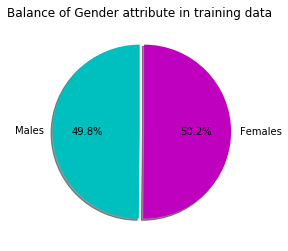

In [120]:
slices = [len(all_train_df[all_train_df['Gender'] == "male"]),
         len(all_train_df[all_train_df['Gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

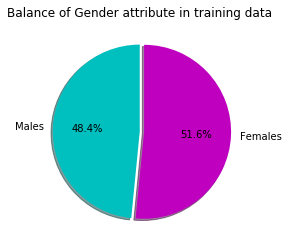

In [122]:
slices = [len(all_test_df[all_test_df['Gender'] == "male"]),
         len(all_test_df[all_test_df['Gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

### Label Encoding

In [124]:
train_df = all_train_df.copy()
train_df['Gender'] = gender_Label_Encoder.transform(train_df['Gender'])
train_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,85,863,970,5,27,403,258,131,4,533,...,137,34,5034,542,478,8717,59511,1968,1434,0
1,515,1590,805,143,284,331,294,205,3,1168,...,46,23,7525,1214,686,12074,63999,1180,2322,1
2,358,1028,324,104,172,226,238,144,4,516,...,26,6,3738,548,320,12474,58352,642,1372,0
3,605,872,1256,27,175,1184,265,442,8,412,...,173,9,4928,445,272,13123,64726,307,1077,1
4,24,347,31,1,1,36,211,62,10,220,...,27,10,940,220,188,2066,14039,615,753,0


In [125]:
test_df = all_test_df.copy()
test_df['Gender'] = gender_Label_Encoder.transform(test_df['Gender'])
test_df.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,583,2457,582,26,51,3,915,152,8,405,...,97,34,4349,412,288,13157,67191,893,2829,1
1,4,84,6,8,8,8,30,4,0,40,...,0,4,232,40,30,300,2174,112,132,0
2,29,137,12,5,5,4,112,23,2,104,...,18,23,215,104,135,872,6520,262,313,1
3,22,432,592,2,86,532,230,50,0,22,...,170,444,1714,24,182,2522,20998,720,1300,0
4,352,1477,802,33,83,47,1018,112,17,809,...,114,41,7619,815,802,14960,82885,1320,2528,1


In [126]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("Gender" , axis=1)
y = train_df['Gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [127]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [128]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [129]:
logisticRegression.score(X,y)

0.6363636363636364

In [131]:
logReg_Predictions = logisticRegression.predict(test_df.drop('Gender', axis=1 ))
logReg_Predictions

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [134]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['Gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['Gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender,predicted_gender
0,583,2457,582,26,51,3,915,152,8,405,...,34,4349,412,288,13157,67191,893,2829,male,male
1,4,84,6,8,8,8,30,4,0,40,...,4,232,40,30,300,2174,112,132,female,female
2,29,137,12,5,5,4,112,23,2,104,...,23,215,104,135,872,6520,262,313,male,female
3,22,432,592,2,86,532,230,50,0,22,...,444,1714,24,182,2522,20998,720,1300,female,female
4,352,1477,802,33,83,47,1018,112,17,809,...,41,7619,815,802,14960,82885,1320,2528,male,male


In [135]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['Gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.640625

#### Randomforest Classifier

In [136]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
randomForestClassifier.score(X,y)

0.98989898989899

In [140]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('Gender',axis = 1))
randforest_prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [142]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["Gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['Gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender,predicted_gender
0,583,2457,582,26,51,3,915,152,8,405,...,34,4349,412,288,13157,67191,893,2829,male,male
1,4,84,6,8,8,8,30,4,0,40,...,4,232,40,30,300,2174,112,132,female,female
2,29,137,12,5,5,4,112,23,2,104,...,23,215,104,135,872,6520,262,313,male,female
3,22,432,592,2,86,532,230,50,0,22,...,444,1714,24,182,2522,20998,720,1300,female,female
4,352,1477,802,33,83,47,1018,112,17,809,...,41,7619,815,802,14960,82885,1320,2528,male,male


In [143]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['Gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.578125

#### LinearSVC Classifier

In [144]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [145]:
linearSVC.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [146]:
linearSVC.score(X,y)

0.5454545454545454

In [147]:
linearSVC_prediction = linearSVC.predict(test_df.drop('Gender',axis=1))
linearSVC_prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [148]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["Gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['Gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender,predicted_gender
0,583,2457,582,26,51,3,915,152,8,405,...,34,4349,412,288,13157,67191,893,2829,male,male
1,4,84,6,8,8,8,30,4,0,40,...,4,232,40,30,300,2174,112,132,female,male
2,29,137,12,5,5,4,112,23,2,104,...,23,215,104,135,872,6520,262,313,male,male
3,22,432,592,2,86,532,230,50,0,22,...,444,1714,24,182,2522,20998,720,1300,female,female
4,352,1477,802,33,83,47,1018,112,17,809,...,41,7619,815,802,14960,82885,1320,2528,male,male


In [150]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['Gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.546875

#### BernoulliNB Classifier

In [151]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [152]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [154]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('Gender',axis=1))
bernoulliNB_prediction

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [155]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["Gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['Gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender,predicted_gender
0,583,2457,582,26,51,3,915,152,8,405,...,34,4349,412,288,13157,67191,893,2829,male,male
1,4,84,6,8,8,8,30,4,0,40,...,4,232,40,30,300,2174,112,132,female,female
2,29,137,12,5,5,4,112,23,2,104,...,23,215,104,135,872,6520,262,313,male,male
3,22,432,592,2,86,532,230,50,0,22,...,444,1714,24,182,2522,20998,720,1300,female,female
4,352,1477,802,33,83,47,1018,112,17,809,...,41,7619,815,802,14960,82885,1320,2528,male,male


In [156]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['Gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.5078125

In [157]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF 

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.640625
1,RandomForesstClassifier,0.578125
2,LinearSVC,0.546875
3,BernoulliNB,0.507812


In [158]:
print('Best Model')
print("Logistic Regression","Accuracy",str(AC_LR))

Best Model
Logistic Regression Accuracy 0.640625


#### Training best model on all available data

In [159]:
print('Combine test and train Data')
all_df_frames = [train_df,test_df]
all_combined_df = pd.concat(all_df_frames)
all_combined_df.head()

Combine test and train Data


,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,...,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits,Gender
0,85,863,970,5,27,403,258,131,4,533,...,137,34,5034,542,478,8717,59511,1968,1434,0
1,515,1590,805,143,284,331,294,205,3,1168,...,46,23,7525,1214,686,12074,63999,1180,2322,1
2,358,1028,324,104,172,226,238,144,4,516,...,26,6,3738,548,320,12474,58352,642,1372,0
3,605,872,1256,27,175,1184,265,442,8,412,...,173,9,4928,445,272,13123,64726,307,1077,1
4,24,347,31,1,1,36,211,62,10,220,...,27,10,940,220,188,2066,14039,615,753,0


In [160]:
X = all_combined_df.drop('Gender',axis=1)
y = all_combined_df['Gender']

In [161]:
logisticRegression = LogisticRegression()
logisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [162]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Saving best model for future use

In [165]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-stylometry.sav'
pickle.dump(linearSVC,open(join(directory,fileName),'wb'))

#### Application Phase

#### Loading saved model

In [166]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [167]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [172]:
unseen_df = pd.DataFrame([{'Number of commas':unseen_comment[counter].count(','),
                                             'Number of full stop':unseen_comment[counter].count('.'),
                                             'Number of @':unseen_comment[counter].count('@'),
                                             'Number of (':unseen_comment[counter].count('('),
                                             'Number of )':unseen_comment[counter].count(')'),
                                             'Number of !':unseen_comment[counter].count('!'),
                                             'Number of -':unseen_comment[counter].count('-'),
                                             'Number of ?':unseen_comment[counter].count('?'),
                                             'Number of %':unseen_comment[counter].count('%'),
                                             'Number of &':unseen_comment[counter].count('&'),
                                             'Number of #':unseen_comment[counter].count('#'),
                                             'Number of _':unseen_comment[counter].count('_'),
                                             'Number of =':unseen_comment[counter].count('='),
                                             'Number of capital letters':sum(
                                                 1 for char in unseen_comment[counter] if char.isupper()),
                                             'Number of semi colons':unseen_comment[counter].count(';'),
                                             'Number of colons':unseen_comment[counter].count(':'),
                                             'Number of spaces':unseen_comment[counter].count(' '),
                                             'Number of small characters':sum(
                                                 1 for char in unseen_comment[counter] if char.islower()),
                                             'Number of forward slash (/)':unseen_comment[counter].count('/'),
                                             'Number of digits':sum(
                                                 1 for char in unseen_comment[counter] if char.isdigit())
                         }] , columns = ['Number of commas','Number of full stop','Number of @',
                  'Number of (','Number of )','Number of !','Number of -',
                  'Number of ?','Number of %','Number of &','Number of #',
                  'Number of _','Number of =','Number of capital letters',
                  'Number of semi colons','Number of colons','Number of spaces',
                  'Number of small characters','Number of forward slash (/)','Number of digits'])
unseen_df

,Number of commas,Number of full stop,Number of @,Number of (,Number of ),Number of !,Number of -,Number of ?,Number of %,Number of &,Number of #,Number of _,Number of =,Number of capital letters,Number of semi colons,Number of colons,Number of spaces,Number of small characters,Number of forward slash (/),Number of digits
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [173]:
prediction = bestModel.predict(unseen_df)

In [174]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Word Uni-gram Features

In [ ]:
directory = join ("Text-Base-Features-Files", "Word","Uni-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

In [176]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male


### Data Visualization

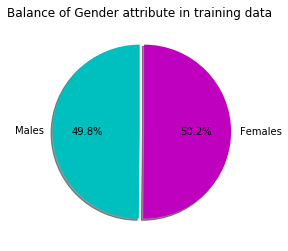

In [177]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

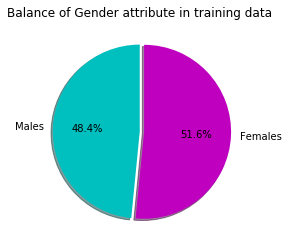

In [178]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [179]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,able,academic,access,according,account,act,action,actually,ad,add,...,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,0.007002,0.000000,0.000000,0.015209,0.032763,0.007646,0.013412,0.062829,0.000000,0.012643,...,0.069306,0.012870,0.0,0.006613,0.038437,0.006293,0.173422,0.01443,0.037107,1
2,0.021602,0.016781,0.010854,0.011730,0.000000,0.011795,0.031035,0.017622,0.010801,0.019503,...,0.053456,0.009927,0.0,0.040806,0.009882,0.000000,0.007868,0.00000,0.009540,0
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.000000,0.001646,0.012617,0.001719,0.001552,...,0.015796,0.000000,0.0,0.000000,0.012579,0.000000,0.018779,0.00000,0.012144,1
4,0.000000,0.000000,0.012634,0.000000,0.000000,0.013729,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.011300,0.000000,0.00000,0.000000,0


In [180]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,1
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,0
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,1
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,1


In [181]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [182]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [184]:
logisticRegression.score(X,y)

0.9158249158249159

In [186]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [187]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,male
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [188]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.4921875

#### Randomforest Classifier

In [189]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [190]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
randomForestClassifier.score(X,y)

0.9865319865319865

In [193]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [194]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [195]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.53125

#### LinearSVC Classifier

In [196]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [197]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [198]:
linearSVC.score(X,y)

0.9764309764309764

In [199]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [200]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,male
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,female


In [201]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.53125

#### BernoulliNB Classifier

In [202]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [203]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [204]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [205]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [206]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.640625

In [207]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.492188
1,RandomForesstClassifier,0.531250
2,LinearSVC,0.531250
3,BernoulliNB,0.640625


In [208]:
print('Best Model')
print("BernoulliNB","Accuracy",str(AC_BNB))

Best Model
BernoulliNB Accuracy 0.640625


#### Training best model on all available data

In [212]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [213]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,1))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [214]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [215]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,years,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006814,0.000000,0.000000,0.015670,0.033174,0.013536,0.062123,0.000000,0.012263,0.000000,...,0.045101,0.069944,0.012726,0.0,0.006746,0.038543,0.006284,0.172115,0.014359,0.037822
2,0.020950,0.015993,0.010767,0.012045,0.000000,0.031213,0.017364,0.010475,0.018851,0.011117,...,0.006933,0.053761,0.009782,0.0,0.041479,0.009875,0.000000,0.007782,0.000000,0.009690
3,0.000000,0.000000,0.000000,0.000000,0.015619,0.005311,0.039886,0.005347,0.004811,0.000000,...,0.003539,0.050967,0.000000,0.0,0.000000,0.040328,0.000000,0.059587,0.000000,0.039573
4,0.000000,0.000000,0.012569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008094,0.000000,0.000000,0.0,0.000000,0.000000,0.011277,0.000000,0.000000,0.000000


In [217]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.006814,0.000000,0.000000,0.015670,0.033174,0.013536,0.062123,0.000000,0.012263,0.000000,...,0.069944,0.012726,0.0,0.006746,0.038543,0.006284,0.172115,0.014359,0.037822,1
2,0.020950,0.015993,0.010767,0.012045,0.000000,0.031213,0.017364,0.010475,0.018851,0.011117,...,0.053761,0.009782,0.0,0.041479,0.009875,0.000000,0.007782,0.000000,0.009690,0
3,0.000000,0.000000,0.000000,0.000000,0.015619,0.005311,0.039886,0.005347,0.004811,0.000000,...,0.050967,0.000000,0.0,0.000000,0.040328,0.000000,0.059587,0.000000,0.039573,1
4,0.000000,0.000000,0.012569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.011277,0.000000,0.000000,0.000000,0


In [219]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [220]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [221]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Saving best model for future use

In [222]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-word-UniGram.sav'
pickle.dump(linearSVC,open(join(directory,fileName),'wb'))

#### Application Phase
##### Loaing saved model

In [223]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [224]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [226]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [227]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,years,yes,yesterday,yoleidy,york,youll,young,youre,youtube,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
prediction = bestModel.predict(tfidf_df)

In [229]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Word Bi-gram Features

In [230]:
directory = join ("Text-Base-Features-Files", "Word","Bi-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
1,0.007011,0.00000,0.000000,0.015228,0.032804,0.013429,0.062908,0.000000,0.012658,0.000000,...,0.012886,0.0,0.0,0.006621,0.038485,0.006301,0.173640,0.014448,0.037154,male
2,0.020944,0.01627,0.010524,0.011373,0.000000,0.030089,0.017085,0.010472,0.018909,0.011132,...,0.009624,0.0,0.0,0.039563,0.009581,0.000000,0.007629,0.000000,0.009250,female
3,0.000000,0.00000,0.000000,0.000000,0.004824,0.001646,0.012616,0.001718,0.001551,0.000000,...,0.000000,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,male
4,0.000000,0.00000,0.012640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.011305,0.000000,0.000000,0.000000,female


In [231]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male


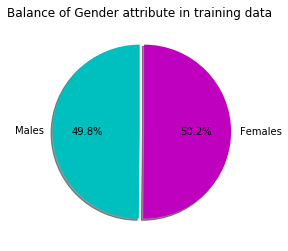

In [232]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

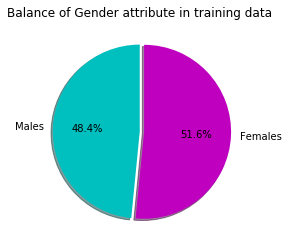

In [233]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [234]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.007011,0.00000,0.000000,0.015228,0.032804,0.013429,0.062908,0.000000,0.012658,0.000000,...,0.012886,0.0,0.0,0.006621,0.038485,0.006301,0.173640,0.014448,0.037154,1
2,0.020944,0.01627,0.010524,0.011373,0.000000,0.030089,0.017085,0.010472,0.018909,0.011132,...,0.009624,0.0,0.0,0.039563,0.009581,0.000000,0.007629,0.000000,0.009250,0
3,0.000000,0.00000,0.000000,0.000000,0.004824,0.001646,0.012616,0.001718,0.001551,0.000000,...,0.000000,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,1
4,0.000000,0.00000,0.012640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.011305,0.000000,0.000000,0.000000,0


In [235]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.012183,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,1
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,0
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.000000,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,1
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.000000,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,1


In [236]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [237]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [238]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [239]:
logisticRegression.score(X,y)

0.9191919191919192

In [240]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [241]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,male
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [242]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.75

#### Randomforest Classifier

In [243]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [244]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [245]:
randomForestClassifier.score(X,y)

0.9865319865319865

In [246]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [247]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [248]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.65625

#### LinearSVC Classifier

In [249]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [250]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [251]:
linearSVC.score(X,y)

0.9696969696969697

In [252]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [253]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,male
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [254]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.71875

#### BernoulliNB Classifier

In [255]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [256]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [257]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [258]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017675,0.00000,0.017762,0.000000,0.008270,0.004232,0.036045,0.008837,0.027924,0.009394,...,0.0,0.0,0.000000,0.000000,0.007943,0.000000,0.031872,0.000000,male,male
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.00000,0.000000,0.000000,0.063954,0.000000,0.000000,0.068337,0.000000,0.072643,...,0.0,0.0,0.000000,0.062524,0.000000,0.049782,0.000000,0.000000,male,female
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018634,0.00965,0.006242,0.006746,0.000000,0.029746,0.000000,0.000000,0.056078,0.000000,...,0.0,0.0,0.035200,0.000000,0.022332,0.013575,0.000000,0.010973,male,male


In [259]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.640625

In [260]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.750000
1,RandomForesstClassifier,0.656250
2,LinearSVC,0.718750
3,BernoulliNB,0.640625


In [261]:
print('Best Model')
print("Logistic Regression","Accuracy",str(AC_LR))

Best Model
Logistic Regression Accuracy 0.75


#### Training best model on all available data

In [262]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [263]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,2))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [264]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [265]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yes,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.006876,0.000000,0.000000,0.033477,0.013660,0.062691,0.000000,0.012375,0.000000,0.0,...,0.070583,0.012843,0.0,0.0,0.006807,0.038895,0.006341,0.173688,0.01449,0.038167
2,0.021099,0.016107,0.010843,0.000000,0.031436,0.017487,0.010549,0.018985,0.011196,0.0,...,0.054144,0.009852,0.0,0.0,0.041774,0.009946,0.000000,0.007837,0.00000,0.009759
3,0.000000,0.000000,0.000000,0.015614,0.005310,0.039874,0.005345,0.004810,0.000000,0.0,...,0.050951,0.000000,0.0,0.0,0.000000,0.040315,0.000000,0.059568,0.00000,0.039561
4,0.000000,0.000000,0.012574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.011282,0.000000,0.00000,0.000000


In [266]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0
1,0.006876,0.000000,0.000000,0.033477,0.013660,0.062691,0.000000,0.012375,0.000000,0.0,...,0.012843,0.0,0.0,0.006807,0.038895,0.006341,0.173688,0.01449,0.038167,1
2,0.021099,0.016107,0.010843,0.000000,0.031436,0.017487,0.010549,0.018985,0.011196,0.0,...,0.009852,0.0,0.0,0.041774,0.009946,0.000000,0.007837,0.00000,0.009759,0
3,0.000000,0.000000,0.000000,0.015614,0.005310,0.039874,0.005345,0.004810,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.040315,0.000000,0.059568,0.00000,0.039561,1
4,0.000000,0.000000,0.012574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.011282,0.000000,0.00000,0.000000,0


In [267]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [272]:
logisticRegression = LogisticRegression()
logisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [273]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Saving best model for future use

In [274]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-word-BiGram.sav'
pickle.dump(logisticRegression,open(join(directory,fileName),'wb'))

#### Application Phase
##### Loaing saved model

In [275]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [276]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [277]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [278]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yes,yesterday,yoleidy,yoleidy carvajal,york,youll,young,youre,youtube,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
prediction = bestModel.predict(tfidf_df)

In [280]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Word Bi-gram Features

In [281]:
directory = join ("Text-Base-Features-Files", "Word","Tri-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
1,0.007022,0.000000,0.000000,0.015253,0.032860,0.013452,0.063013,0.000000,0.012680,0.00000,...,0.0,0.0,0.0,0.006633,0.038550,0.006312,0.173932,0.014472,0.037216,male
2,0.020978,0.016296,0.010541,0.011392,0.000000,0.030138,0.017113,0.010489,0.018939,0.01115,...,0.0,0.0,0.0,0.039628,0.009597,0.000000,0.007641,0.000000,0.009265,female
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.001646,0.012616,0.001718,0.001551,0.00000,...,0.0,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,male
4,0.000000,0.000000,0.012644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.011309,0.000000,0.000000,0.000000,female


In [282]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male


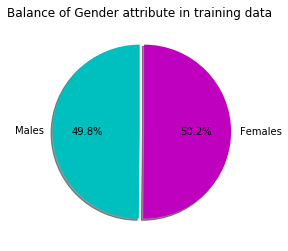

In [283]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

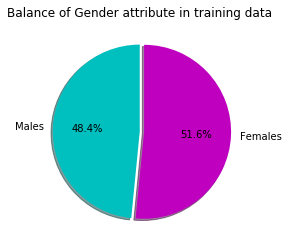

In [284]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [285]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.007022,0.000000,0.000000,0.015253,0.032860,0.013452,0.063013,0.000000,0.012680,0.00000,...,0.0,0.0,0.0,0.006633,0.038550,0.006312,0.173932,0.014472,0.037216,1
2,0.020978,0.016296,0.010541,0.011392,0.000000,0.030138,0.017113,0.010489,0.018939,0.01115,...,0.0,0.0,0.0,0.039628,0.009597,0.000000,0.007641,0.000000,0.009265,0
3,0.000000,0.000000,0.000000,0.000000,0.004825,0.001646,0.012616,0.001718,0.001551,0.00000,...,0.0,0.0,0.0,0.000000,0.012578,0.000000,0.018777,0.000000,0.012143,1
4,0.000000,0.000000,0.012644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.000000,0.000000,0.011309,0.000000,0.000000,0.000000,0


In [286]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,1


In [287]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [289]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [290]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [291]:
logisticRegression.score(X,y)

0.9090909090909091

In [292]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [293]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male,male
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male,male


In [294]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.7421875

##### Randomforest Classifier

In [295]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [296]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
randomForestClassifier.score(X,y)

0.9831649831649831

In [298]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [299]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male,female
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male,female


In [300]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.6328125

##### LinearSVC Classifier

In [301]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [302]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [303]:
linearSVC.score(X,y)

0.9696969696969697

In [304]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [305]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male,male
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male,male


In [306]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.71875

##### BernoulliNB Classifier

In [307]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [308]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [309]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [310]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,able,academic,access,according,account,action,actually,ad,add,added,...,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender,predicted_gender
0,0.017679,0.000000,0.017766,0.000000,0.008272,0.004233,0.036053,0.008839,0.027931,0.009396,...,0.0,0.0,0.000000,0.000000,0.007945,0.000000,0.031879,0.000000,male,male
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.146726,0.000000,0.139633,0.000000,0.000000,0.000000,female,female
2,0.000000,0.000000,0.000000,0.000000,0.064997,0.000000,0.000000,0.069451,0.000000,0.073827,...,0.0,0.0,0.000000,0.063543,0.000000,0.050594,0.000000,0.000000,male,female
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.018643,0.009655,0.006245,0.006749,0.000000,0.029760,0.000000,0.000000,0.056105,0.000000,...,0.0,0.0,0.035217,0.000000,0.022343,0.013581,0.000000,0.010978,male,male


In [311]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.640625

In [312]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.742188
1,RandomForesstClassifier,0.632812
2,LinearSVC,0.718750
3,BernoulliNB,0.640625


In [313]:
print('Best Model')
print("Logistic Regression","Accuracy",str(AC_LR))

Best Model
Logistic Regression Accuracy 0.7421875


##### Training best model on all available data

In [314]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [316]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='word',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,3))
tfidfVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [317]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [319]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006884,0.000000,0.000000,0.033514,0.013675,0.062760,0.000000,0.012388,0.000000,0.0,...,0.012857,0.0,0.0,0.0,0.006815,0.038938,0.006348,0.173881,0.014506,0.038210
2,0.021112,0.016117,0.010850,0.000000,0.031455,0.017498,0.010556,0.018997,0.011203,0.0,...,0.009858,0.0,0.0,0.0,0.041800,0.009952,0.000000,0.007842,0.000000,0.009765
3,0.000000,0.000000,0.000000,0.015620,0.005311,0.039888,0.005347,0.004812,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.040330,0.000000,0.059590,0.000000,0.039575
4,0.000000,0.000000,0.012607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.011312,0.000000,0.000000,0.000000


In [320]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve,gender
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.006884,0.000000,0.000000,0.033514,0.013675,0.062760,0.000000,0.012388,0.000000,0.0,...,0.0,0.0,0.0,0.006815,0.038938,0.006348,0.173881,0.014506,0.038210,1
2,0.021112,0.016117,0.010850,0.000000,0.031455,0.017498,0.010556,0.018997,0.011203,0.0,...,0.0,0.0,0.0,0.041800,0.009952,0.000000,0.007842,0.000000,0.009765,0
3,0.000000,0.000000,0.000000,0.015620,0.005311,0.039888,0.005347,0.004812,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.040330,0.000000,0.059590,0.000000,0.039575,1
4,0.000000,0.000000,0.012607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.011312,0.000000,0.000000,0.000000,0


In [321]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [322]:
logisticRegression = LogisticRegression()
logisticRegression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [323]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

##### Saving best model for future use

In [324]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-word-TriGram.sav'
pickle.dump(logisticRegression,open(join(directory,fileName),'wb'))

##### Application Phase
##### Loaing saved model

In [325]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [326]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [327]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [328]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,able,academic,access,account,action,actually,ad,add,added,added video,...,yesterday,yoleidy,yoleidy carvajal,yoleidy carvajal daily,york,youll,young,youre,youtube,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
prediction = bestModel.predict(tfidf_df)

In [330]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Char Uni-gram Features

In [331]:
directory = join ("Text-Base-Features-Files", "Char","Uni-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.662902,0.215322,0.036412,0.060687,0.121374,0.267023,0.077679,0.133512,0.120967,0.249193,...,0.188709,0.186290,0.252458,0.099527,0.024275,0.063327,0.004921,0.090119,0.014961,female
1,0.651980,0.235313,0.047564,0.083993,0.106324,0.343434,0.065808,0.076233,0.130290,0.210813,...,0.186727,0.183952,0.274724,0.095069,0.033230,0.077737,0.006484,0.089089,0.007180,male
2,0.664086,0.221591,0.051476,0.092381,0.096863,0.344707,0.061358,0.085487,0.115319,0.210597,...,0.162271,0.188037,0.279672,0.089739,0.027806,0.062371,0.005823,0.066406,0.003659,female
3,0.727054,0.249955,0.049267,0.052598,0.111751,0.297322,0.055338,0.087574,0.109235,0.178203,...,0.186181,0.164977,0.255738,0.081718,0.053028,0.035363,0.003594,0.050565,0.002373,male
4,0.581151,0.262826,0.045298,0.103291,0.092039,0.388929,0.060301,0.077613,0.128825,0.228895,...,0.230045,0.214517,0.297756,0.101272,0.032315,0.102191,0.006726,0.056162,0.003853,female


In [332]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.171638,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.240970,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.196648,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.108092,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.211987,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male


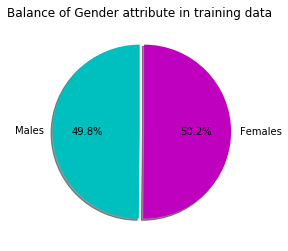

In [333]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

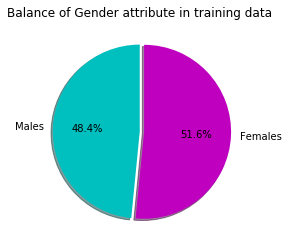

In [334]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [335]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.662902,0.215322,0.036412,0.060687,0.121374,0.267023,0.077679,0.133512,0.120967,0.249193,...,0.188709,0.186290,0.252458,0.099527,0.024275,0.063327,0.004921,0.090119,0.014961,0
1,0.651980,0.235313,0.047564,0.083993,0.106324,0.343434,0.065808,0.076233,0.130290,0.210813,...,0.186727,0.183952,0.274724,0.095069,0.033230,0.077737,0.006484,0.089089,0.007180,1
2,0.664086,0.221591,0.051476,0.092381,0.096863,0.344707,0.061358,0.085487,0.115319,0.210597,...,0.162271,0.188037,0.279672,0.089739,0.027806,0.062371,0.005823,0.066406,0.003659,0
3,0.727054,0.249955,0.049267,0.052598,0.111751,0.297322,0.055338,0.087574,0.109235,0.178203,...,0.186181,0.164977,0.255738,0.081718,0.053028,0.035363,0.003594,0.050565,0.002373,1
4,0.581151,0.262826,0.045298,0.103291,0.092039,0.388929,0.060301,0.077613,0.128825,0.228895,...,0.230045,0.214517,0.297756,0.101272,0.032315,0.102191,0.006726,0.056162,0.003853,0


In [336]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.171638,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,1
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.240970,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,0
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.196648,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,1
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.108092,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,0
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.211987,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,1


In [337]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [338]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [339]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [340]:
logisticRegression.score(X,y)

0.6161616161616161

In [341]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [342]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,gender,predicted_gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female,male
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female,female
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male,female


In [343]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.6875

#### Randomforest Classifier

In [344]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [345]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [346]:
randomForestClassifier.score(X,y)

0.98989898989899

In [347]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [349]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,gender,predicted_gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female,male
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female,male
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male,male


In [350]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.6015625

#### LinearSVC Classifier

In [351]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [352]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [353]:
linearSVC.score(X,y)

0.6397306397306397

In [354]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [355]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,gender,predicted_gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female,female
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female,female
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male,female


In [356]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.6953125

#### BernoulliNB Classifier

In [357]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [358]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [359]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [360]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,gender,predicted_gender
0,0.639635,0.242697,0.045293,0.089059,0.119237,0.342903,0.053385,0.084835,0.125077,0.243509,...,0.217591,0.250740,0.088398,0.037456,0.061989,0.018053,0.061428,0.005332,male,male
1,0.578799,0.165371,0.066371,0.094815,0.128001,0.369780,0.033185,0.085334,0.066149,0.240970,...,0.198446,0.279706,0.075852,0.042667,0.133188,0.000000,0.057081,0.009740,female,female
2,0.614157,0.224530,0.069941,0.083930,0.122214,0.376212,0.068469,0.088347,0.130609,0.229667,...,0.206186,0.267986,0.098654,0.032394,0.059835,0.010446,0.070915,0.004538,male,male
3,0.509577,0.463252,0.046481,0.030987,0.123949,0.480302,0.015494,0.046481,0.046325,0.138975,...,0.262509,0.139443,0.061974,0.061974,0.015546,0.000000,0.015546,0.000000,female,female
4,0.621601,0.248727,0.052050,0.115219,0.111888,0.351456,0.073510,0.070568,0.106468,0.230659,...,0.214143,0.263495,0.102369,0.031412,0.053527,0.007806,0.072281,0.006356,male,male


In [361]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.5078125

In [362]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.687500
1,RandomForesstClassifier,0.601562
2,LinearSVC,0.695312
3,BernoulliNB,0.507812


In [364]:
print('Best Model')
print("Linear SVC","Accuracy",str(AC_LSVC))

Best Model
Linear SVC Accuracy 0.6953125


#### Training best model on all available data

In [365]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [366]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,1))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [367]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [368]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,0.662988,0.214845,0.036466,0.060634,0.121838,0.266163,0.077794,0.133708,0.120983,0.249811,...,0.005072,0.188291,0.186752,0.252236,0.099673,0.024254,0.063505,0.004954,0.089949,0.015145
1,0.652246,0.234857,0.047647,0.083942,0.106760,0.342423,0.065923,0.076366,0.130343,0.211395,...,0.003033,0.186365,0.184460,0.274559,0.095236,0.033210,0.077978,0.006530,0.088946,0.007270
2,0.664341,0.221156,0.051565,0.092324,0.097258,0.343684,0.061464,0.085635,0.115363,0.211173,...,0.002882,0.161953,0.188552,0.279497,0.089893,0.027789,0.062562,0.005864,0.066298,0.003705
3,0.727313,0.249458,0.049351,0.052564,0.112204,0.296432,0.055432,0.087723,0.109274,0.178685,...,0.002695,0.185811,0.165423,0.255571,0.081857,0.052993,0.035470,0.003619,0.050481,0.002403
4,0.581482,0.262359,0.045385,0.103246,0.092431,0.387847,0.060416,0.077761,0.128899,0.229563,...,0.001508,0.229636,0.215144,0.297625,0.101465,0.032300,0.102523,0.006775,0.056080,0.003902


In [369]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,z,gender
0,0.662988,0.214845,0.036466,0.060634,0.121838,0.266163,0.077794,0.133708,0.120983,0.249811,...,0.188291,0.186752,0.252236,0.099673,0.024254,0.063505,0.004954,0.089949,0.015145,0
1,0.652246,0.234857,0.047647,0.083942,0.106760,0.342423,0.065923,0.076366,0.130343,0.211395,...,0.186365,0.184460,0.274559,0.095236,0.033210,0.077978,0.006530,0.088946,0.007270,1
2,0.664341,0.221156,0.051565,0.092324,0.097258,0.343684,0.061464,0.085635,0.115363,0.211173,...,0.161953,0.188552,0.279497,0.089893,0.027789,0.062562,0.005864,0.066298,0.003705,0
3,0.727313,0.249458,0.049351,0.052564,0.112204,0.296432,0.055432,0.087723,0.109274,0.178685,...,0.185811,0.165423,0.255571,0.081857,0.052993,0.035470,0.003619,0.050481,0.002403,1
4,0.581482,0.262359,0.045385,0.103246,0.092431,0.387847,0.060416,0.077761,0.128899,0.229563,...,0.229636,0.215144,0.297625,0.101465,0.032300,0.102523,0.006775,0.056080,0.003902,0


In [370]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [380]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [381]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Saving best model for future use

In [382]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-char-UniGram.sav'
pickle.dump(logisticRegression,open(join(directory,fileName),'wb'))

#### Application Phase
##### Loaing saved model

In [383]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [384]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [385]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x27 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [386]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,z
0,0.685485,0.174946,0.016017,0.0,0.096325,0.20724,0.080083,0.04805,0.095649,0.303601,...,0.0,0.143137,0.063916,0.255664,0.064066,0.015979,0.128735,0.0,0.128132,0.0


In [387]:
prediction = bestModel.predict(tfidf_df)

In [388]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Char Bi-gram Features

In [389]:
directory = join ("Text-Base-Features-Files", "Char","Bi-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.628607,0.055431,0.023019,0.027716,0.011548,0.009332,0.030025,0.043883,0.018477,0.059849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,female
1,0.619908,0.055379,0.026695,0.026333,0.025429,0.015526,0.030063,0.018252,0.025881,0.047308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.001956,male
2,0.630223,0.072976,0.028896,0.028228,0.019037,0.013925,0.027899,0.021335,0.020569,0.048306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823,female
3,0.693324,0.045906,0.031714,0.011361,0.043233,0.018278,0.033054,0.021642,0.033877,0.045701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000426,0.000155,male
4,0.549619,0.055852,0.023467,0.036687,0.020808,0.012998,0.021355,0.015058,0.016427,0.038474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,female


In [390]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.0,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.0,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male


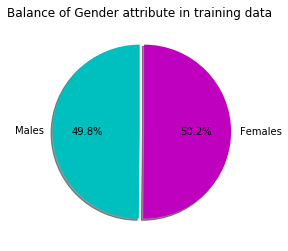

In [391]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

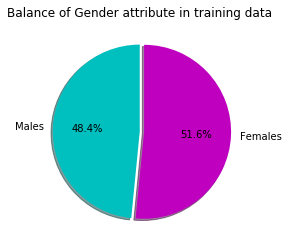

In [392]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [393]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.628607,0.055431,0.023019,0.027716,0.011548,0.009332,0.030025,0.043883,0.018477,0.059849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
1,0.619908,0.055379,0.026695,0.026333,0.025429,0.015526,0.030063,0.018252,0.025881,0.047308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000655,0.001956,1
2,0.630223,0.072976,0.028896,0.028228,0.019037,0.013925,0.027899,0.021335,0.020569,0.048306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000823,0
3,0.693324,0.045906,0.031714,0.011361,0.043233,0.018278,0.033054,0.021642,0.033877,0.045701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000426,0.000155,1
4,0.549619,0.055852,0.023467,0.036687,0.020808,0.012998,0.021355,0.015058,0.016427,0.038474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0


In [394]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.0,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,1
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,1
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.0,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,1


In [395]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [396]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [397]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [398]:
logisticRegression.score(X,y)

0.6363636363636364

In [399]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [400]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,,a,b,c,d,e,f,g,h,i,...,zs,zt,zu,zv,zw,zx,zy,zz,gender,predicted_gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male,male
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male,male
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male,female


In [401]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.6953125

#### Randomforest Classifier

In [402]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [403]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [404]:
randomForestClassifier.score(X,y)

0.9764309764309764

In [405]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [406]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,,a,b,c,d,e,f,g,h,i,...,zs,zt,zu,zv,zw,zx,zy,zz,gender,predicted_gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male,female
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male,female
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male,female


In [407]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.609375

#### LinearSVC Classifier

In [408]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [409]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [410]:
linearSVC.score(X,y)

0.7272727272727273

In [411]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [412]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,,a,b,c,d,e,f,g,h,i,...,zs,zt,zu,zv,zw,zx,zy,zz,gender,predicted_gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male,male
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male,male
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male,female


In [413]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.75

#### BernoulliNB Classifier

In [414]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [415]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [416]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [417]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,,a,b,c,d,e,f,g,h,i,...,zs,zt,zu,zv,zw,zx,zy,zz,gender,predicted_gender
0,0.608010,0.056983,0.021333,0.021939,0.026598,0.013728,0.025531,0.023298,0.022279,0.063806,...,0.000239,0.0,0.000000,0.0,0.000121,0.0,0.000241,0.000365,male,male
1,0.545520,0.026899,0.017873,0.026899,0.031383,0.009057,0.017933,0.026899,0.008966,0.058087,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
2,0.583397,0.058241,0.035667,0.025963,0.028770,0.007797,0.033682,0.011929,0.026665,0.046857,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.001162,0.000000,male,female
3,0.462649,0.028228,0.014067,0.000000,0.042342,0.071284,0.014114,0.028228,0.000000,0.014067,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,female,female
4,0.591528,0.060068,0.026351,0.043378,0.021689,0.019822,0.036726,0.011650,0.021152,0.042162,...,0.000102,0.0,0.000077,0.0,0.000206,0.0,0.006771,0.000062,male,male


In [418]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.6171875

In [419]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.695312
1,RandomForesstClassifier,0.609375
2,LinearSVC,0.750000
3,BernoulliNB,0.617188


In [420]:
print('Best Model')
print("Linear SVC","Accuracy",str(AC_LSVC))

Best Model
Linear SVC Accuracy 0.75


#### Training best model on all available data

In [421]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [422]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,2))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [423]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [424]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zq,zr,zs,zt,zu,zv,zw,zx,zy,zz
0,0.628502,0.055440,0.023154,0.027785,0.011604,0.009305,0.030171,0.044097,0.018567,0.060060,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.620014,0.055406,0.026862,0.026408,0.025561,0.015487,0.030219,0.018347,0.026016,0.047491,...,0.00033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.001980
2,0.630317,0.073011,0.029076,0.028308,0.019136,0.013890,0.028044,0.021446,0.020676,0.048492,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000833
3,0.693399,0.045926,0.031909,0.011392,0.043455,0.018231,0.033224,0.021753,0.034051,0.045874,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000423,0.000157
4,0.549764,0.055885,0.023615,0.036795,0.020918,0.012967,0.021469,0.015138,0.016514,0.038627,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [425]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zr,zs,zt,zu,zv,zw,zx,zy,zz,gender
0,0.628502,0.055440,0.023154,0.027785,0.011604,0.009305,0.030171,0.044097,0.018567,0.060060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
1,0.620014,0.055406,0.026862,0.026408,0.025561,0.015487,0.030219,0.018347,0.026016,0.047491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000651,0.001980,1
2,0.630317,0.073011,0.029076,0.028308,0.019136,0.013890,0.028044,0.021446,0.020676,0.048492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000833,0
3,0.693399,0.045926,0.031909,0.011392,0.043455,0.018231,0.033224,0.021753,0.034051,0.045874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000423,0.000157,1
4,0.549764,0.055885,0.023615,0.036795,0.020918,0.012967,0.021469,0.015138,0.016514,0.038627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0


In [426]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [427]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [428]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Saving best model for future use

In [429]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-char-BiGram.sav'
pickle.dump(logisticRegression,open(join(directory,fileName),'wb'))

#### Application Phase
#### Loaing saved model

In [430]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [431]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [432]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x755 sparse matrix of type '<class 'numpy.float64'>'
	with 121 stored elements in Compressed Sparse Row format>

In [433]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,b,c,d,e,f,g,h,i,...,zq,zr,zs,zt,zu,zv,zw,zx,zy,zz
0,0.629933,0.014753,0.014788,0.0,0.044468,0.0,0.05929,0.0,0.0,0.132778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
prediction = bestModel.predict(tfidf_df)

In [435]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']


## Text Classification Using Char Tri-gram Features

In [436]:
directory = join ("Text-Base-Features-Files", "Char","Tri-Gram-Features")
all_train_df = pd.read_csv(join(directory,"Train-Features.csv"))
all_train_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.620069,0.054678,0.009174,0.000000,0.000000,0.000000,0.002364,0.002520,0.018349,0.000000,...,0.000000,0.002372,0.000000,0.000000,0.023168,0.021276,0.009746,0.010218,0.013995,female
1,0.614113,0.054861,0.011328,0.002460,0.002708,0.001018,0.005751,0.001362,0.012117,0.002071,...,0.003260,0.005945,0.003981,0.005184,0.019697,0.018878,0.003892,0.003515,0.006763,male
2,0.623791,0.072231,0.014827,0.002023,0.003533,0.001477,0.004045,0.001437,0.017007,0.001214,...,0.002975,0.004059,0.001589,0.002798,0.012114,0.008652,0.001969,0.001821,0.003437,female
3,0.689225,0.045634,0.006585,0.002527,0.001437,0.000871,0.005621,0.000170,0.008489,0.000630,...,0.001404,0.001915,0.001327,0.004732,0.011693,0.011029,0.003662,0.002120,0.002250,male
4,0.543034,0.055183,0.010893,0.002080,0.000913,0.002767,0.003368,0.001197,0.012799,0.000303,...,0.001783,0.003661,0.002137,0.003786,0.014304,0.014034,0.001736,0.000910,0.003600,female


In [437]:
all_test_df = pd.read_csv(join(directory,"Test-Features.csv"))
all_test_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.004440,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.003053,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.000000,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.002431,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male


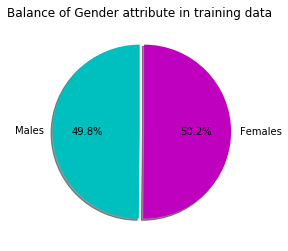

In [438]:
slices = [len(all_train_df[all_train_df['gender'] == "male"]),
         len(all_train_df[all_train_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

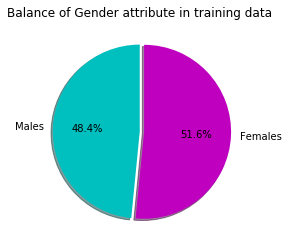

In [439]:
slices = [len(all_test_df[all_test_df['gender'] == "male"]),
         len(all_test_df[all_test_df['gender'] == "female"])]
labelsOfSlices = ['Males','Females']
cols = ['c','m']
plt.pie(slices,
       labels=labelsOfSlices,
       colors=cols,
       startangle=90,
       shadow=True,
       explode=(0,0.05),
       autopct='%1.1f%%')
plt.title('Balance of Gender attribute in training data')
plt.show()

In [440]:
train_df = all_train_df.copy()
train_df['gender'] = gender_Label_Encoder.transform(train_df['gender'])
train_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.620069,0.054678,0.009174,0.000000,0.000000,0.000000,0.002364,0.002520,0.018349,0.000000,...,0.000000,0.002372,0.000000,0.000000,0.023168,0.021276,0.009746,0.010218,0.013995,0
1,0.614113,0.054861,0.011328,0.002460,0.002708,0.001018,0.005751,0.001362,0.012117,0.002071,...,0.003260,0.005945,0.003981,0.005184,0.019697,0.018878,0.003892,0.003515,0.006763,1
2,0.623791,0.072231,0.014827,0.002023,0.003533,0.001477,0.004045,0.001437,0.017007,0.001214,...,0.002975,0.004059,0.001589,0.002798,0.012114,0.008652,0.001969,0.001821,0.003437,0
3,0.689225,0.045634,0.006585,0.002527,0.001437,0.000871,0.005621,0.000170,0.008489,0.000630,...,0.001404,0.001915,0.001327,0.004732,0.011693,0.011029,0.003662,0.002120,0.002250,1
4,0.543034,0.055183,0.010893,0.002080,0.000913,0.002767,0.003368,0.001197,0.012799,0.000303,...,0.001783,0.003661,0.002137,0.003786,0.014304,0.014034,0.001736,0.000910,0.003600,0


In [441]:
test_df = all_test_df.copy()
test_df['gender'] = gender_Label_Encoder.transform(test_df['gender'])
test_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.004440,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,1
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,0
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.003053,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,1
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.000000,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.002431,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,1


In [442]:
print("Splitting Input attrivute vector and output class for learning process")
X = train_df.drop("gender" , axis=1)
y = train_df['gender']

Splitting Input attrivute vector and output class for learning process


### Training Model

#### Logistic Regression

In [444]:
logisticRegression = LogisticRegression()
logisticRegression 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [445]:
logisticRegression.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [446]:
logisticRegression.score(X,y)

0.6430976430976431

In [447]:
logReg_Predictions = logisticRegression.predict(test_df.drop('gender', axis=1 ))
logReg_Predictions

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [448]:
df_after_LogRegPrediction = test_df.copy()
df_after_LogRegPrediction['gender'] = gender_Label_Encoder.inverse_transform(
df_after_LogRegPrediction['gender'])
df_after_LogRegPrediction['predicted_gender'] = gender_Label_Encoder.inverse_transform(logReg_Predictions)
df_after_LogRegPrediction.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y t,y w,ye,yo,you,ys,ys,z,gender,predicted_gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male,female


In [449]:
print('Accuracy score :')
AC_LR = accuracy_score(test_df['gender'],logReg_Predictions,normalize=True)
AC_LR

Accuracy score :


0.703125

#### Randomforest Classifier

In [450]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [451]:
randomForestClassifier.fit(X,y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [452]:
randomForestClassifier.score(X,y)

0.9831649831649831

In [453]:
randforest_prediction = randomForestClassifier.predict(test_df.drop('gender',axis = 1))
randforest_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [454]:
df_test_afterPredict_rfc = test_df.copy()
df_test_afterPredict_rfc["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_rfc['gender'])
df_test_afterPredict_rfc['predicted_gender'] = gender_Label_Encoder.inverse_transform(randforest_prediction)
df_test_afterPredict_rfc.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y t,y w,ye,yo,you,ys,ys,z,gender,predicted_gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male,female


In [455]:
print('Accuracy score :')
AC_RF = accuracy_score(test_df['gender'],randforest_prediction,normalize=True)
AC_RF

Accuracy score :


0.625

#### LinearSVC Classifier

In [456]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [457]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [458]:
linearSVC.score(X,y)

0.7811447811447811

In [459]:
linearSVC_prediction = linearSVC.predict(test_df.drop('gender',axis=1))
linearSVC_prediction

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [460]:
print("After Prediction")
df_test_afterPredict_lSVC = test_df.copy()
df_test_afterPredict_lSVC["gender"] = gender_Label_Encoder.inverse_transform(df_test_afterPredict_lSVC['gender'])
df_test_afterPredict_lSVC['predicted_gender'] = gender_Label_Encoder.inverse_transform(linearSVC_prediction)
df_test_afterPredict_lSVC.head()

After Prediction


,,a,a,ab,ac,ad,al,am,an,ap,...,y t,y w,ye,yo,you,ys,ys,z,gender,predicted_gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male,female


In [461]:
print('Accuracy score :')
AC_LSVC = accuracy_score(test_df['gender'],linearSVC_prediction,normalize=True)
AC_LSVC

Accuracy score :


0.765625

#### BernoulliNB Classifier

In [462]:
bernoulliNB = BernoulliNB()
bernoulliNB

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [463]:
bernoulliNB.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [464]:
bernoulliNB_prediction = bernoulliNB.predict(test_df.drop('gender',axis=1))
bernoulliNB_prediction

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

In [465]:
print("After Prediction")
df_test_afterPredict_bernoulliNB = test_df.copy()
df_test_afterPredict_bernoulliNB["gender"] = gender_Label_Encoder.inverse_transform(
    df_test_afterPredict_bernoulliNB['gender'])
df_test_afterPredict_bernoulliNB['predicted_gender'] = gender_Label_Encoder.inverse_transform(bernoulliNB_prediction)
df_test_afterPredict_bernoulliNB.head()

After Prediction


,,a,a,ab,ac,ad,al,am,an,ap,...,y t,y w,ye,yo,you,ys,ys,z,gender,predicted_gender
0,0.602614,0.056477,0.008960,0.002431,0.002165,0.000929,0.005191,0.002395,0.015788,0.004207,...,0.003406,0.001575,0.003833,0.005724,0.004393,0.003499,0.002050,0.005024,male,male
1,0.538179,0.026537,0.004453,0.000000,0.000000,0.005027,0.009179,0.000000,0.008905,0.000000,...,0.000000,0.000000,0.000000,0.026986,0.018357,0.000000,0.000000,0.009056,female,female
2,0.577608,0.057663,0.012590,0.003053,0.000782,0.002369,0.004325,0.000768,0.020983,0.000779,...,0.007233,0.001568,0.003740,0.007065,0.006488,0.001486,0.001558,0.004268,male,male
3,0.460695,0.028109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014149,0.000000,...,0.014632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female,female
4,0.586587,0.059566,0.012868,0.002971,0.004056,0.001630,0.002508,0.001858,0.012290,0.000735,...,0.003540,0.001757,0.002911,0.018289,0.017131,0.003374,0.002343,0.005998,male,male


In [466]:
print("Accuracy Score")
AC_BNB = accuracy_score(test_df['gender'],bernoulliNB_prediction,normalize=True)
AC_BNB

Accuracy Score


0.5859375

In [467]:
print("Detailed Performance of all the models")
AC_DF = pd.DataFrame( 
    {
        "Model":['Logistic Regression',
                 "RandomForesstClassifier"
                 ,"LinearSVC"
                 ,"BernoulliNB"
                ] 
    }
)
AC_DF['Accuracy'] = [ AC_LR,AC_RF,AC_LSVC,AC_BNB ]
AC_DF

Detailed Performance of all the models


,Model,Accuracy
0,Logistic Regression,0.703125
1,RandomForesstClassifier,0.625000
2,LinearSVC,0.765625
3,BernoulliNB,0.585938


In [468]:
print('Best Model')
print("Linear SVC","Accuracy",str(AC_LSVC))

Best Model
Linear SVC Accuracy 0.765625


#### Training best model on all available data

In [469]:
directory = "Text-Base-Features-Files"
text_df = pd.read_csv(join(directory,"Processed-clean-data.csv"))
text_df.head()

,comment_text,gender
0,Inspiration juices for today Beautiful makeup ...,female
1,Oh honey Dont force us to stage an interventio...,male
2,Getting ready for AOM Annual Meeting I love se...,female
3,Tack m n Kul som fan att tr ffasTack sj lv man...,male
4,Social Influencers Who Are Changing The World ...,female


In [470]:
tfidfVectorizer = TfidfVectorizer(strip_accents='unicode',
                                 analyzer='char',
                                 stop_words='english',
                                 max_features=1000,
                                 ngram_range=(1,3))
tfidfVectorizer

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [471]:
train_features = tfidfVectorizer.fit_transform(text_df['comment_text'])

In [473]:
tfidf_df = pd.DataFrame(train_features.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y p,y s,y t,y w,ye,yo,you,ys,ys,z
0,0.619877,0.054680,0.009243,0.000000,0.000000,0.000000,0.002399,0.002569,0.018355,0.000000,...,0.002581,0.000000,0.002405,0.000000,0.000000,0.023270,0.021340,0.009918,0.010325,0.014160
1,0.614161,0.054883,0.011416,0.002490,0.002748,0.001035,0.005838,0.001389,0.012126,0.002089,...,0.002094,0.003284,0.006029,0.004035,0.005193,0.019791,0.018943,0.003962,0.003553,0.006845
2,0.623824,0.072259,0.014943,0.002047,0.003585,0.001501,0.004107,0.001466,0.017020,0.001224,...,0.001473,0.002997,0.004117,0.001611,0.002803,0.012171,0.008682,0.002004,0.001841,0.003479
3,0.689267,0.045652,0.006636,0.002557,0.001458,0.000885,0.005706,0.000173,0.008495,0.000636,...,0.000695,0.001414,0.001943,0.001345,0.004740,0.011748,0.011067,0.003728,0.002143,0.002277
4,0.543102,0.055208,0.010979,0.002106,0.000926,0.002812,0.003420,0.001221,0.012809,0.000306,...,0.000613,0.001797,0.003713,0.002167,0.003793,0.014373,0.014083,0.001767,0.000920,0.003644


In [474]:
tfidf_df['gender'] = gender_Label_Encoder.transform(text_df['gender'])
tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y s,y t,y w,ye,yo,you,ys,ys,z,gender
0,0.619877,0.054680,0.009243,0.000000,0.000000,0.000000,0.002399,0.002569,0.018355,0.000000,...,0.000000,0.002405,0.000000,0.000000,0.023270,0.021340,0.009918,0.010325,0.014160,0
1,0.614161,0.054883,0.011416,0.002490,0.002748,0.001035,0.005838,0.001389,0.012126,0.002089,...,0.003284,0.006029,0.004035,0.005193,0.019791,0.018943,0.003962,0.003553,0.006845,1
2,0.623824,0.072259,0.014943,0.002047,0.003585,0.001501,0.004107,0.001466,0.017020,0.001224,...,0.002997,0.004117,0.001611,0.002803,0.012171,0.008682,0.002004,0.001841,0.003479,0
3,0.689267,0.045652,0.006636,0.002557,0.001458,0.000885,0.005706,0.000173,0.008495,0.000636,...,0.001414,0.001943,0.001345,0.004740,0.011748,0.011067,0.003728,0.002143,0.002277,1
4,0.543102,0.055208,0.010979,0.002106,0.000926,0.002812,0.003420,0.001221,0.012809,0.000306,...,0.001797,0.003713,0.002167,0.003793,0.014373,0.014083,0.001767,0.000920,0.003644,0


In [475]:
X = tfidf_df.drop('gender',axis=1)
y = tfidf_df['gender']

In [476]:
linearSVC = LinearSVC()
linearSVC

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [477]:
linearSVC.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

####  Saving best model for future use

In [478]:
directory = "Best-Learned-Models"
if not os.path.exists(directory):
    os.makedirs(directory)

fileName = 'best-model-char-TriGram.sav'
pickle.dump(logisticRegression,open(join(directory,fileName),'wb'))

#### Application Phase
##### Loaing saved model

In [479]:
bestModel = pickle.load(open(join(directory,fileName),'rb'))

In [480]:
unseen_comment = input('Please enter your comment here:')

Please enter your comment here:Ok leave it for now i will try using original paypal details from other payment method. If I need anything I will let you know. I will install DHL by tomorrow too. I will tell you what details I need from you for that


In [481]:
unseen_comment = [unseen_comment]
unseen_tfidf = tfidfVectorizer.transform(unseen_comment)
unseen_tfidf

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 212 stored elements in Compressed Sparse Row format>

In [482]:
tfidf_df = pd.DataFrame(unseen_tfidf.todense(),
                             columns=tfidfVectorizer.get_feature_names())
tfidf_df.head()

,,a,a,ab,ac,ad,al,am,an,ap,...,y p,y s,y t,y w,ye,yo,you,ys,ys,z
0,0.6078,0.014235,0.0,0.0,0.0,0.0,0.0,0.0,0.014335,0.0,...,0.0,0.0,0.015025,0.0,0.0,0.043616,0.044444,0.0,0.0,0.0


In [483]:
prediction = bestModel.predict(tfidf_df)

In [484]:
print('Prediction:',gender_Label_Encoder.inverse_transform(prediction))

Prediction: ['female']
